# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

**GitHub:** https://github.com/Doradalberto/APS_Isadora_Dalberto

**Base de Dados:** https://www.gapminder.org/data/documentation/gd004/ &
                   https://data.worldbank.org/indicator/NY.GDP.MKTP.KD

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1\APS_Isadora_Dalberto


**Formatação para deixar os gráficos grandes**

In [56]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15

**Lê os arquivos que vamos utilizar no projeto:**

In [57]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [58]:
vida = pd.read_excel('life_expectancy_years.xlsx')

**Altera o índice das tabelas:**

In [59]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

**Países pertencentes ao Bloco SADC (áfrica austral):**

In [60]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

**Paises da áfrica que não pertencem ao Bloco SADC:**

In [61]:
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

**Listas de Anos**

In [62]:
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

**Criação da Coluna AF_AUS e AF_NAO_AUS**

In [63]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

**Loc selecionando os países**

In [64]:
dados_af_aus = dados_indice.loc[af_aus]     #PIB de todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]     #PIB de todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]     #ExpVida de todos os paises que sao do SADC

vida_af_nao_aus = vida_indice.loc[af_nao_aus]     #ExpVida de todos os paises que sao da africa mas nao sao da SADC

africa = af_aus + af_nao_aus     #definição do que é africa = soma das duas listas

dados_africa = dados_indice.loc[africa]     #PIB de todos os paises da áfrica

vida_africa = vida_indice.loc[africa]     #ExpVida de todos os paises da áfrica

**Retirando as duas ultimas colunas (AF_AUS e AF_NAO_AUS) + Seleção de Ano**

In [65]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum() #soma POR ANO

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum() #soma POR ANO

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum()

In [66]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum()

In [67]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

**Colocando denovo as colunas AF_AUS e AF_NAO_AUS**

In [68]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

#africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

**Gráfico do PIB x Tempo em todo o período de tempo estudado**

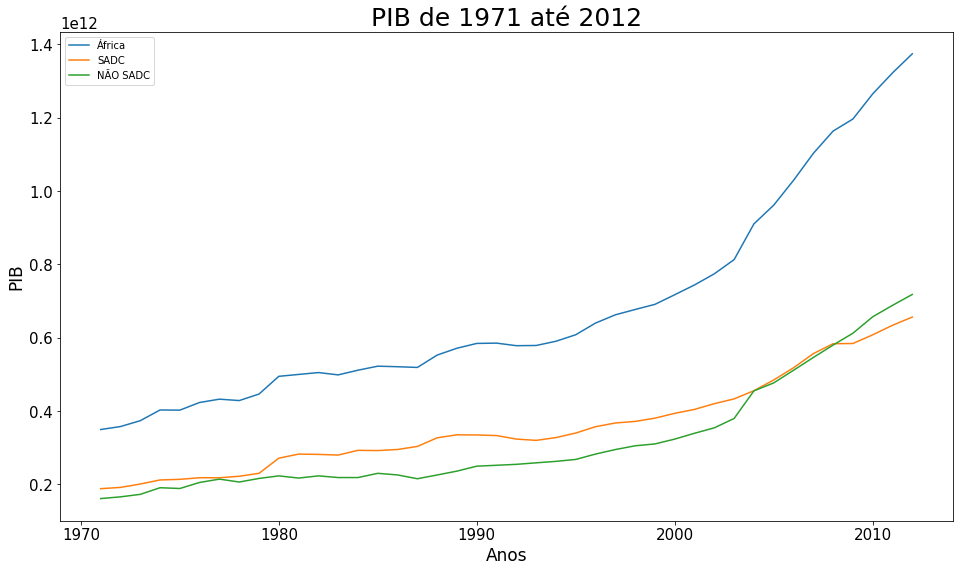

In [69]:
plt.plot(anos, soma_africa_anos_total, label="África")
plt.plot(anos, soma_aus_anos_total, label="SADC")
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.title("PIB de 1971 até 2012")
plt.legend()
plt.show()

**Gráfico PIB Médio em todo período de tempo estudado**

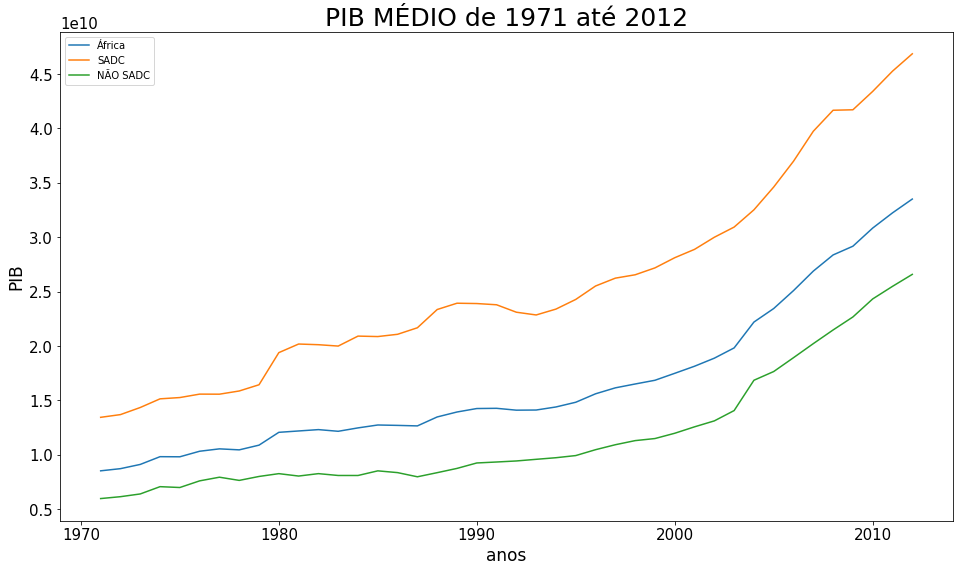

In [70]:
plt.plot(anos, soma_africa_anos_total/41, label="África")
plt.plot(anos, soma_aus_anos_total/14, label="SADC" )
plt.plot(anos, soma_nao_aus_anos_total/27, label="NÃO SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB MÉDIO de 1971 até 2012")
plt.legend()
plt.show()

>> **Análise do Gráfico:** Como é percebido, os países pertencentes ao SADC possuem um PIB por país superior aos outros países da África.

**Retirada dos NaN**

In [87]:
dados_af_nao_aus_retirada = dados_af_nao_aus.dropna()
dados_af_aus_retirada = dados_af_aus.dropna()
vida_af_nao_aus_retirada = vida_af_nao_aus.dropna()
vida_af_aus_retirada = vida_af_aus.dropna()

## Dúvida nisso

In [88]:
af_aus_1972 = dados_af_aus_retirada[1972]
af_nao_aus_1972 = dados_af_nao_aus_retirada[1972]
af_aus_2010 = dados_af_aus_retirada[2010]
af_nao_aus_2010 = dados_af_nao_aus_retirada[2010]
vida_af_aus_2010 = vida_af_aus_retirada[2010]
vida_af_nao_aus_2010 = vida_af_nao_aus_retirada[2010]
vida_af_aus_1972 = vida_af_aus_retirada[1972]
vida_af_nao_aus_1972 = vida_af_nao_aus_retirada[1972]

af_aus_1972.rename("PIB 1972", inplace=True)
af_nao_aus_1972.rename("PIB 1972", inplace=True)
af_aus_2010.rename("PIB 2010", inplace=True)
af_nao_aus_2010.rename("PIB 2010", inplace=True)
vida_af_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_nao_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_aus_1972.rename("ExpVida 1972", inplace=True)
vida_af_nao_aus_1972.rename("ExpVida 1972", inplace=True)

af_aus_1972

country
South Africa        1.460000e+11
Botswana            7.430000e+08
Congo, Dem. Rep.    2.270000e+10
Lesotho             3.770000e+08
Madagascar          5.040000e+09
Malawi              1.700000e+09
Zambia              7.210000e+09
Zimbabwe            7.290000e+09
Name: PIB 1972, dtype: float64

In [89]:
comp_2010_af_nao_aus = pd.concat([af_nao_aus_2010, vida_af_nao_aus_2010], axis=1, sort=True)

comp_1972_af_nao_aus = pd.concat([af_nao_aus_1972, vida_af_nao_aus_1972], axis=1, sort=True)

comp_2010_af_aus = pd.concat([af_aus_2010, vida_af_aus_2010], axis=1, sort=True) #dropna buga
comp_1972_af_aus = pd.concat([af_aus_1972, vida_af_aus_1972], axis=1, sort=True) ########### dropna buga

comp_1972_all = pd.concat([comp_1972_af_aus, comp_1972_af_nao_aus], axis=1, sort=True) ## dropna buga
comp_2010_all = pd.concat([comp_2010_af_aus, comp_2010_af_nao_aus], axis=1, sort=True) #3 colunas

**Gráfico Expectativa de Vida x PIB 1990**

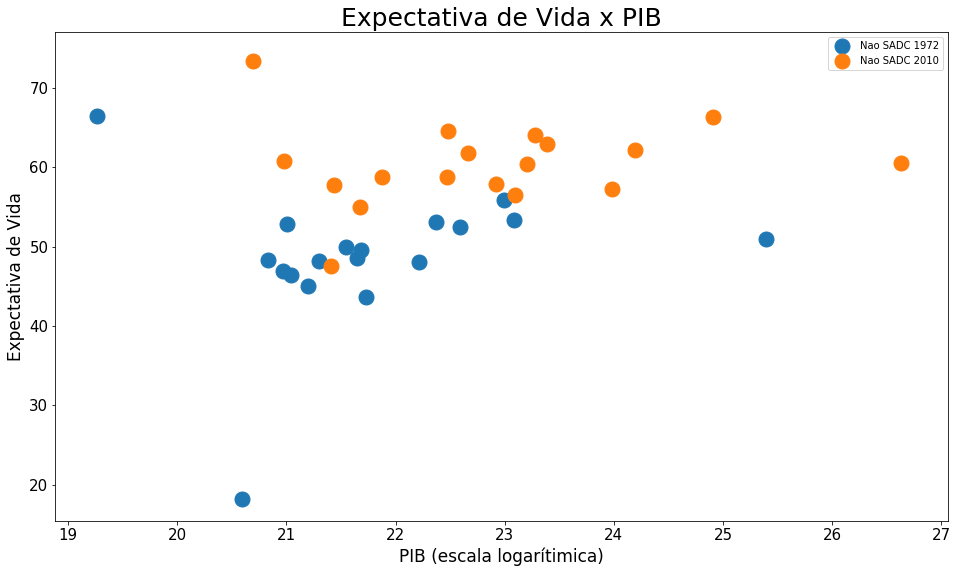

In [90]:
plt.scatter(np.log(comp_1972_af_nao_aus["PIB 1972"]),comp_1972_af_nao_aus["ExpVida 1972"], label="Nao SADC 1972")
plt.scatter(np.log(comp_2010_af_nao_aus["PIB 2010"]), comp_2010_af_nao_aus["ExpVida 2010"], label="Nao SADC 2010")
plt.title("Expectativa de Vida x PIB")
plt.xlabel("PIB (escala logarítimica)")
plt.ylabel("Expectativa de Vida")
plt.legend()
plt.show()

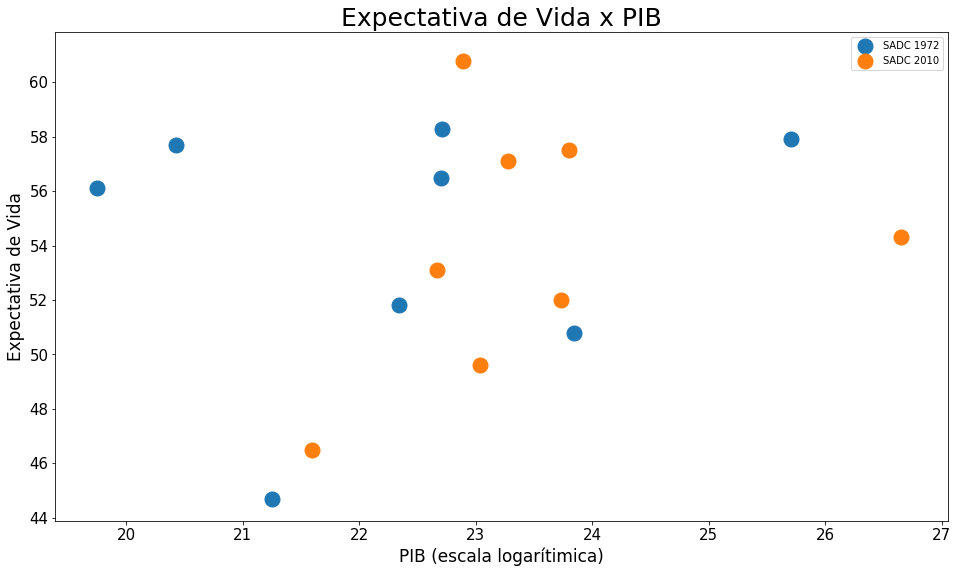

In [91]:
plt.scatter(np.log(comp_1972_af_aus["PIB 1972"]),comp_1972_af_aus["ExpVida 1972"], label="SADC 1972")
plt.scatter(np.log(comp_2010_af_aus["PIB 2010"]), comp_2010_af_aus["ExpVida 2010"], label="SADC 2010")
plt.title("Expectativa de Vida x PIB")
plt.xlabel("PIB (escala logarítimica)")
plt.ylabel("Expectativa de Vida")
plt.legend()
plt.show()

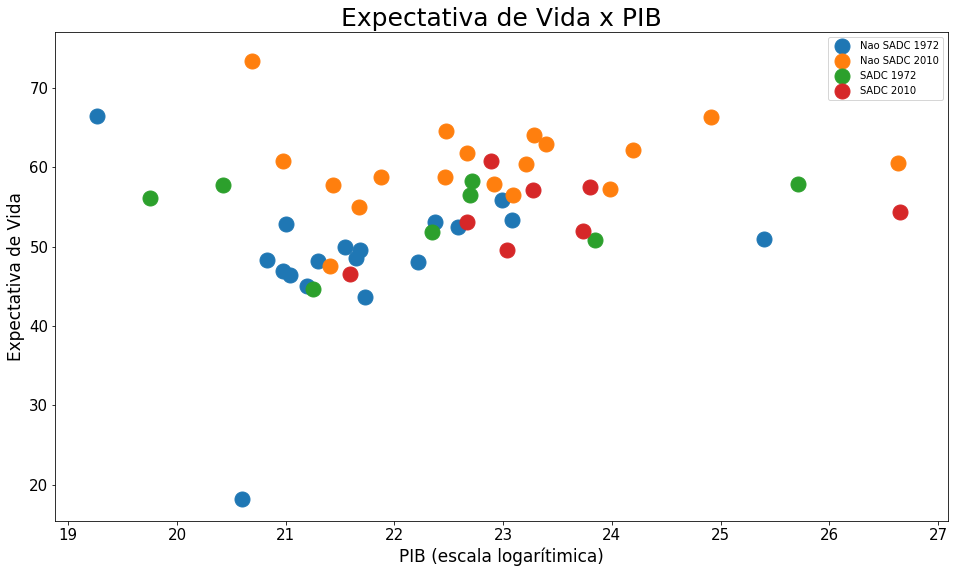

In [92]:
plt.scatter(np.log(comp_1972_af_nao_aus["PIB 1972"]),comp_1972_af_nao_aus["ExpVida 1972"], label="Nao SADC 1972")
plt.scatter(np.log(comp_2010_af_nao_aus["PIB 2010"]), comp_2010_af_nao_aus["ExpVida 2010"], label="Nao SADC 2010")
plt.scatter(np.log(comp_1972_af_aus["PIB 1972"]),comp_1972_af_aus["ExpVida 1972"], label="SADC 1972")
plt.scatter(np.log(comp_2010_af_aus["PIB 2010"]), comp_2010_af_aus["ExpVida 2010"], label="SADC 2010")
plt.title("Expectativa de Vida x PIB")
plt.xlabel("PIB (escala logarítimica)")
plt.ylabel("Expectativa de Vida")
plt.legend()
plt.show()

**Gráfico Disperção média - erro 2010**

Ajuste linear entre X3 e X4:
Coeficiente linear: 48.61894027002943
Coeficiente angular: 3.8850981557887665e-11
Ajuste linear entre X3 e X4:
Coeficiente linear: 53.50776313525494
Coeficiente angular: 2.847612972381479e-11


ValueError: x and y must be the same size

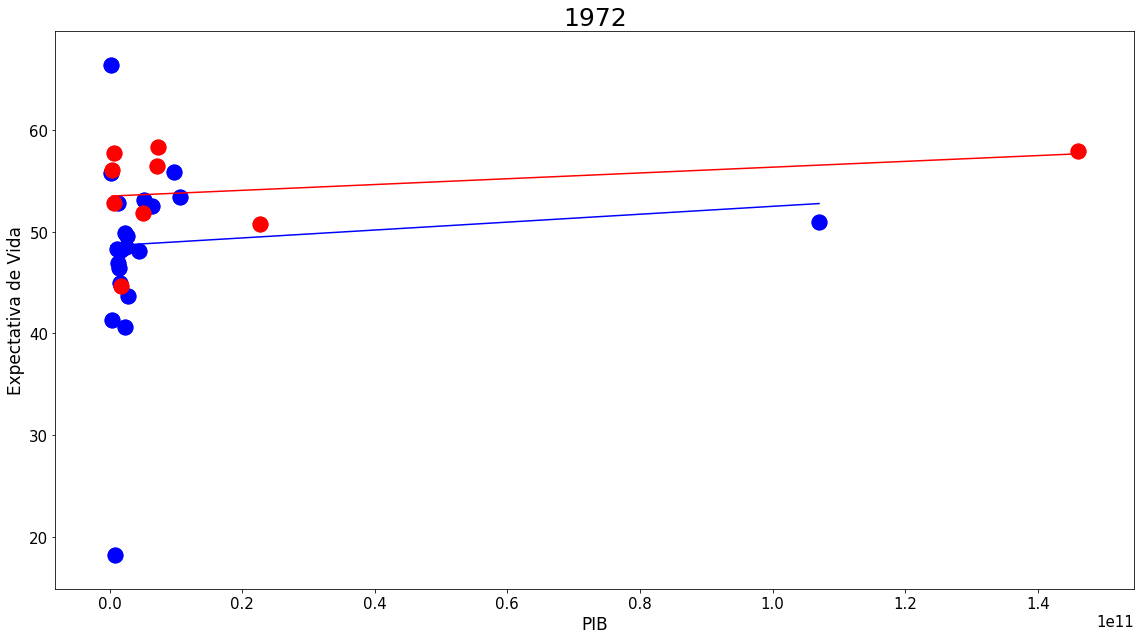

In [100]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('1972')
    plt.xlabel('PIB')
    plt.ylabel('Expectativa de Vida')
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)
    plt.tight_layout()

    
af_nao_aus_1972_2 = dados_af_nao_aus[1972]
vida_af_nao_aus_1972_2 = vida_af_nao_aus[1972]

af_aus_1972_2 = dados_af_aus[1972]
vida_af_aus_1972_2 = vida_af_aus[1972]


plt.scatter(af_nao_aus_1972_2, vida_af_nao_aus_1972_2, color="b", label="Não SADC")
reta(af_nao_aus_1972_2, vida_af_nao_aus_1972_2, "b")

plt.scatter(af_aus_1972_2, vida_af_aus_1972_2, color="r", label="SADC 1972")
reta(af_aus_1972_2, vida_af_aus_1972_2, "r")

plt.scatter(af_aus_2010, vida_af_aus_2010, color="r", label="SADC 2010")
reta(af_aus_2010, vida_af_aus_2010, "green")

plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

In [93]:
af_aus_1972 = dados_af_aus_retirada[1990]
af_aus_1972_sem_africa_sul = af_aus_1972.drop(labels = ['South Africa']) 
sem_africa = aus_anos_total.drop(labels=["South Africa"])

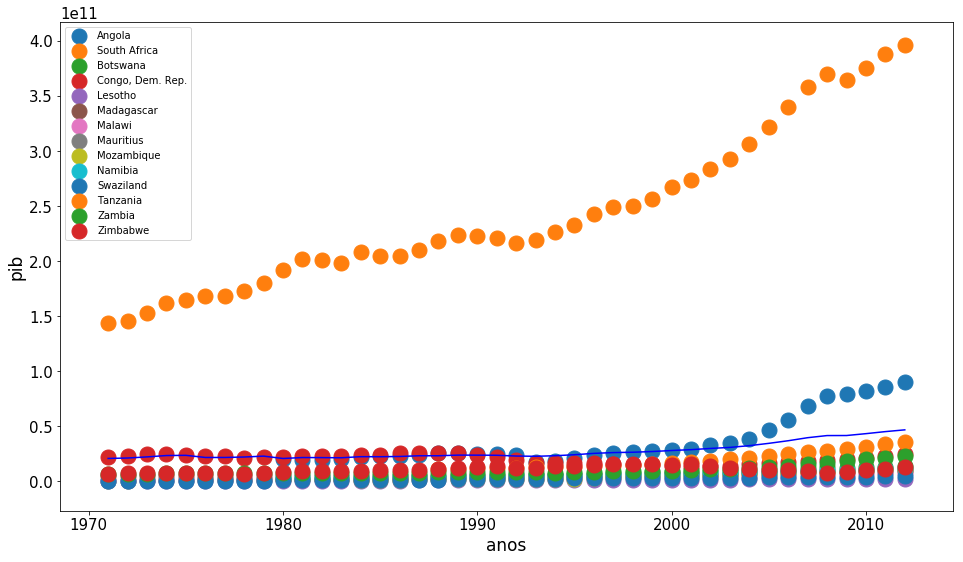

In [94]:
aus_anos_total_t = aus_anos_total.T
medias_aus_anos_total_t = aus_anos_total.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=aus_anos_total_t[pais])
plt.plot(medias_aus_anos_total_t.index, medias_aus_anos_total_t, color="b")
plt.xlabel("anos")
plt.ylabel("pib")
plt.legend()

[]

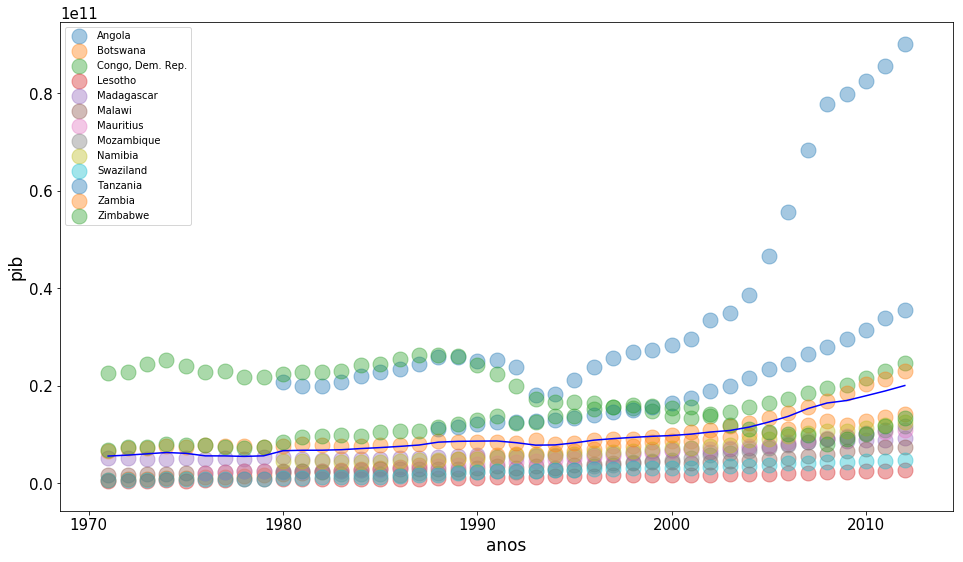

In [95]:
#sem a africa do sul

aus_anos_total_t = sem_africa.T
medias_aus_anos_total_t = sem_africa.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=aus_anos_total_t[pais], alpha=0.4)
plt.plot(medias_aus_anos_total_t.index, medias_aus_anos_total_t, color="b")
plt.xlabel("anos")
plt.ylabel("pib")
plt.legend()
plt.plot()

[]

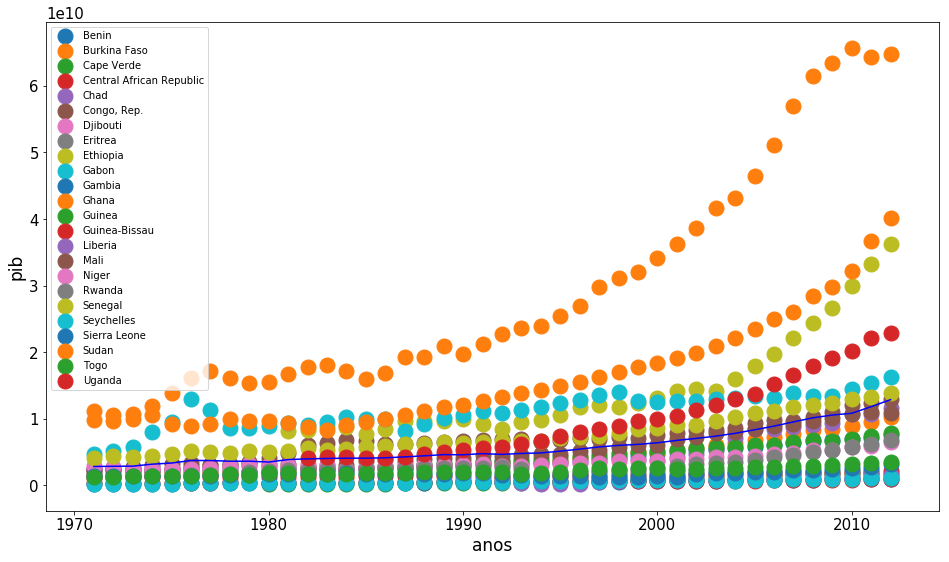

In [96]:
sem_nigeria = nao_aus_anos_total.drop(labels=["Nigeria","Cameroon","Burundi"])
nao_aus_anos_total_t = sem_nigeria.T
medias_nao_aus_anos_total_t = sem_nigeria.mean()
for pais in nao_aus_anos_total_t.columns:
    plt.scatter(x=nao_aus_anos_total_t.index, y=nao_aus_anos_total_t[pais])
plt.plot(medias_nao_aus_anos_total_t.index, medias_nao_aus_anos_total_t, color="b")
plt.xlabel("anos")
plt.ylabel("pib")
plt.legend()
plt.plot()

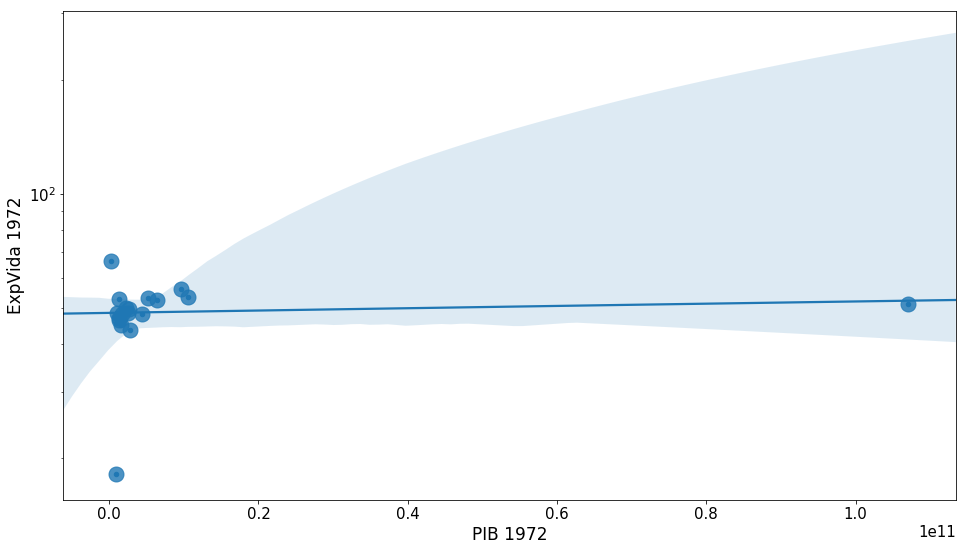

In [97]:
comp_1972_af_nao_aus.plot.scatter(x="PIB 1972", y="ExpVida 1972", logy=True)
sns.regplot(comp_1972_af_nao_aus['PIB 1972'], comp_1972_af_nao_aus['ExpVida 1972'])
plt.show()

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!